### Riddler Express
While waiting in line to vote early last week, I overheard a discussion between election officials. Apparently, there may have been a political sign that was within 100 feet of the polling place, against New York State law.

This got me thinking. Suppose a polling site is a square building whose sides are 100 feet in length. An election official takes a string that is also 100 feet long and ties one end to a door located in the middle of one of the building’s sides. She then holds the other end of the string in her hand.

What’s the area of the region outside of the building she can reach while holding the string?

### Draw the problem

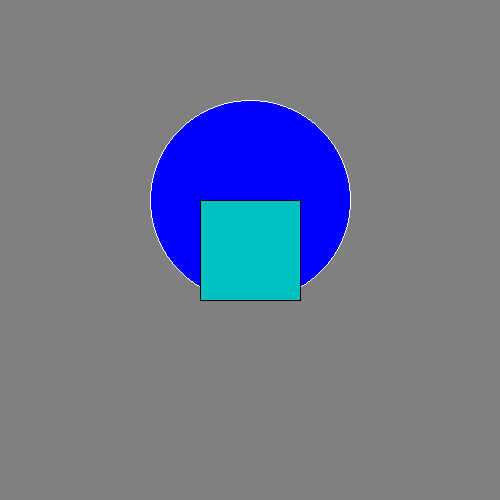

In [50]:
from PIL import Image, ImageDraw
from IPython.display import display # to display images in notebook

# radius of circle is 100
radius = 100

# Image object represents large background image
im = Image.new('RGB', (500, 500), (128, 128, 128))
draw = ImageDraw.Draw(im)

# call draw method from Draw object to make a figure 
# make our voting square building
# upper left x coord, upper left 7 coord,
draw.rectangle((300, 300, 200, 200), fill=(0, 192, 192), outline=(255, 255, 255))

# add in our circular voting area: 
# find point x1, y1 which represents middle of wall 
# x1 - radius, y1 - radius, x1 + radius, y1 + radius
draw.ellipse((250 - radius, 200 - radius, 250 + radius, 200 + radius), fill=(0, 0, 255), outline=(255, 255, 255))
draw.rectangle((300, 300, 200, 200), fill=(0, 192, 192), outline=(0, 0, 0))

display(im)

### Solving the Problem:

It becomes a basic geometry problem: 
    
- Solve for the semi-circle coverage (`SC`)
- Solve for each of the partial segments  (`PS`)
- Solve: `SC` + 2*`PS`

#### Finding Partial Segment

- harder to visualize this in python, shown below:

![PS](ps_ex.jpg)

- it becomes a right triangle with the following information: 
    - leg a has side of 50
    - hypotenuse is going to be 100 since thats where circle and square overlap 
    - interior angle is going to be 60 degrees (cos x = 0.5)
    - can solve for leg b then. 
- Can then solve the partial segment as: 
    - 1/6 of circle area - right triangle describe above

In [64]:
from math import pi

# calculate PS:

# start by finding other leg of triangle using Pyth Theor
leg_a = 50
hyp = 100
leg_b = (hyp**2 - leg_a**2)**0.5

# then calculate area of right triangle
rt_area = 0.5 * (leg_a*leg_b)

# PS will be the following: the 60-degree sector of circle - the right triangle 
PS = (1/6) * pi * (radius ** 2) - rt_area

In [65]:
# semi-circle is easy to solve for 
SC = 0.5 * pi * (radius **2)

In [66]:
# final answer
solution = SC + 2*PS
print(f"Coverage is approximately: {solution:.2f}")

Coverage is approximately: 21849.81
